# Paleomagnetic Sampling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

import smpsite.smpsite as smp

## Setup 

Our goal is to estimate the paleomagnetic pole $\mu$ for a given period of time or age. For doing so, we are going to recollec a number $N_k$ samples from $K$ different sites, $k=1,2,\ldots,K$. For each site, consequence of secular variation, we are not observing directly $\mu$, but instead $\mu_k$ as a result of secular variations of the magnetic field. If we compute the Fisher mean $\hat \mu_k$ (the hat symbol will be used always for statistical inferences, in opposition to the _true_ value of the pole), then we hope that the new Fisher mean $\hat \mu$ of the $\hat \mu_k$s will give us a estimate for the paleomagnetic poles that will average out the secular variation. The question we are trying to address here is what is the best recollection design of the $N = N_1 + \ldots + N_K$ sample poles that will lead to a better estimation of the final paleomagnetic pole $\mu$. 

We are going to consider the following statistical model for how the sample poles are generated. 
$$
\mu_k \sim \text{Fisher}(\mu, \kappa_\text{secular}) \quad k=1,2,\ldots,K
$$
$$
x_{k,j} \sim \text{Fisher}(\mu_k, \kappa_\text{vgp}) \quad \text{with probability $1-p$ and } 
$$
$$
x_{k,j} \sim \text{Unif}(S^2) \quad \text{otherwise} \quad j=1,2,\ldots,N_k,
$$
where $\kappa_\text{secular}$ and $\kappa_\text{vgp}$ are the dispersion parameters of the Fisher distribution. The parameter $p$ has been added to quantify the effect of outliers in the sampling process. With probability $1-p$ we are going to observe a verical sample of the magnetic field, while with probability $p$ our sample will be corrupted and instead we will observe an spourious medition, modelled by an uniform distribution on the sphere, that is, no information at all about the orientation of the true field. 

We are going to compare two different strategies for estimating the paleomagnetic pole $\mu$:
- Method 1: Compute the Fisher mean of ALL the sample points afor each site and then compute a second Fisher mean of these site vgps to obtain a final estimation of the true paleomagnetic pole.
- Method 2: Assume we are perfectly able to detect outliers, so we can repeat Method 1 after removing those sample points that are clearly ourliers. 

Since we want to know what is the choice of $N_1, N_2, \ldots, N_K$ that will lead to the best estimation of the paleomagnetic pole, we are going to compare these two methods for different strategies. For example, if $N_k$ is large enought then we may be in the case where we can use Method 2, and then we will compare it with the performance of Method 1 when $N_1 = \ldots = N_K = 1$, for example.

In [2]:
%%time

kappa_within_site = 10
latitude = 30
outlier_rate = 0.05
N = 70
n_iters = 1000

params1 = smp.Params(kappa_within_site=kappa_within_site,
                 site_lat=latitude,
                 outlier_rate=outlier_rate,
                 N_per_site=5,
                 N=N, 
                 site_long=0.0)

params2 = smp.Params(kappa_within_site=kappa_within_site,
                 site_lat=latitude,
                 outlier_rate=outlier_rate,
                 N_per_site=1,
                 N=N,
                 site_long=0.0)

df_standard = smp.simulate_estimations(params1, n_iters=n_iters, ignore_outliers=True)
df_simple_sample = smp.simulate_estimations(params2, n_iters=n_iters, ignore_outliers=False)

ValueError: zero-dimensional arrays cannot be concatenated

ERROR! Session/line number was not unique in database. History logging moved to new session 988


NameError: name 'df_standard' is not defined

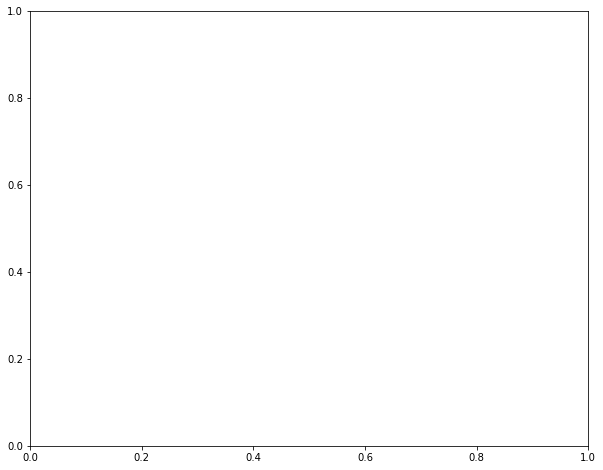

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,8))

sns.histplot(df_standard.error_angle, ax=axes, color='#e84118', stat='probability', binwidth=5, binrange=(0,180), alpha=.7)
sns.histplot(df_simple_sample.error_angle, ax=axes, color='#0097e6', stat='probability', binwidth=5, binrange=(0,180), alpha=.7)

textstr = '\n'.join((
r'$RMSE Method 1=%.2f$' % (np.mean(df_standard.error_angle**2)**.5, ),
r'$RMSE Method 2=%.2f$' % (np.mean(df_simple_sample.error_angle**2)**.5, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
plt.text(0.65, 0.95, textstr, transform=axes.transAxes, fontsize=14,
        verticalalignment='top', bbox=props);

In [19]:
params1 = smp.Params(kappa_within_site=kappa_vgp,
                 
                 outlier_rate=0.1,
                 N_per_site=5,
                 N=100,
                 site_lat=50.0, 
                 site_long=0.0)

In [21]:
design = smp.generate_design(params1)
design
for i, nk in enumerate(design):
    print(i, nk)

0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
8 5
9 5
10 5
11 5
12 5
13 5
14 5
15 5
16 5
17 5
18 5
19 5


In [48]:
directions_tk03 = ipmag.tk03(n=10, dec=0, lat=45, rev='no', G1=-18e3, G2=0, G3=0, B_threshold=0)
for lat, long, intensity in directions_tk03:
    print(lat, long, intens)

38.44693568551692 53.16487154657384 30464.714607028898
16.60664727575827 53.94171908981154 28093.001305274287
4.03406558419721 63.280187061780325 30108.408664459737
354.0421091748628 49.52047731212363 31604.76267120668
345.9692933778522 67.50773558726097 34597.74798090689
354.25987402876467 62.32054780377285 36125.2686568209
312.4868420790086 81.632964312786 19517.512551122803
344.79997348022795 78.22430234415809 27321.722306161886
12.444389396301894 53.93541229234997 23719.860747491293
40.876318456315126 58.965532610818045 24517.27552070276


In [49]:
trans_dec, trans_inc, _, _ = pmag.dia_vgp([0,0], [45,45], 0, 45, 0)


In [50]:
trans_dec, trans_inc, _, _ 

([180.0, 180.0],
 [71.56505117707799, 71.56505117707799],
 [0.0, 0.0],
 [0.0, 0.0])